Load libraries

In [261]:
import pandas as pd
import numpy as np

# check prophet version
import fbprophet
# print version number
print('Prophet %s' % fbprophet.__version__)

Prophet 0.7.1


Load and read dataset

In [262]:
# load the car sales dataset
from pandas import read_csv
# load data
# load datasets
df = pd.read_csv('https://raw.githubusercontent.com/TracyRenee61/Misc-Predictions/main/Anon%20Training%20Deficiency%20-%20Anon%20Training%20Deficiency%20(1).csv')
df = df[['Month Year', 'Training Deficiency']]
# summarize shape
print(df.shape)
# show first few rows
print(df)

(53, 2)
   Month Year  Training Deficiency
0      Jun-16                  111
1      Jul-16                  124
2      Aug-16                  133
3      Sep-16                  139
4      Oct-16                  131
5      Nov-16                  149
6      Dec-16                  171
7      Jan-17                  189
8      Feb-17                  207
9      Mar-17                  210
10     Apr-17                  195
11     May-17                  190
12     Jun-17                  204
13     Jul-17                  136
14     Aug-17                  139
15     Sep-17                  152
16     Oct-17                  147
17     Nov-17                  107
18     Dec-17                  105
19     Jan-18                  112
20     Feb-18                  117
21     Mar-18                  143
22     Apr-18                  146
23     May-18                  156
24     Jun-18                  142
25     Jul-18                  143
26     Aug-18                  135
27     Sep-1

Load and plot the dataset

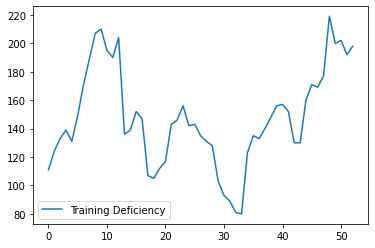

In [263]:
# load and plot the car sales dataset
from pandas import read_csv
from matplotlib import pyplot
# load data
path = 'https://raw.githubusercontent.com/TracyRenee61/Misc-Predictions/main/Anon%20Training%20Deficiency%20-%20Anon%20Training%20Deficiency%20(1).csv'
df = read_csv(path, header=0)
# plot the time series
df.plot()
pyplot.show()

Set month and year up to acceptable format

In [264]:
month = df['Month Year'].astype(str)
df['Month'] = month.str[:-3]
df

,Month Year,Training Deficiency,Month
0,Jun-16,111,Jun
1,Jul-16,124,Jul
2,Aug-16,133,Aug
3,Sep-16,139,Sep
4,Oct-16,131,Oct
5,Nov-16,149,Nov
6,Dec-16,171,Dec
7,Jan-17,189,Jan
8,Feb-17,207,Feb
9,Mar-17,210,Mar


In [265]:
dic = {'Jan':1, 'Feb':2, 'Mar':3, 'Apr':4, 'May': 5, 'Jun': 6, 'Jul': 7, 'Aug': 8, 'Sep': 9, 'Oct': 10, 'Nov': 11, 'Dec': 12}
df.Month = df.Month.map(dic)
df

,Month Year,Training Deficiency,Month
0,Jun-16,111,6
1,Jul-16,124,7
2,Aug-16,133,8
3,Sep-16,139,9
4,Oct-16,131,10
5,Nov-16,149,11
6,Dec-16,171,12
7,Jan-17,189,1
8,Feb-17,207,2
9,Mar-17,210,3


In [266]:
year = df['Month Year'].astype(str)
df['Year'] = "20" + year.str[4:]
df

,Month Year,Training Deficiency,Month,Year
0,Jun-16,111,6,2016
1,Jul-16,124,7,2016
2,Aug-16,133,8,2016
3,Sep-16,139,9,2016
4,Oct-16,131,10,2016
5,Nov-16,149,11,2016
6,Dec-16,171,12,2016
7,Jan-17,189,1,2017
8,Feb-17,207,2,2017
9,Mar-17,210,3,2017


In [267]:
df.Year = df.Year.astype(str)
df.Month = df.Month.astype(str)
df['Datetime'] = df['Year'] + "-" + df['Month']
df

,Month Year,Training Deficiency,Month,Year,Datetime
0,Jun-16,111,6,2016,2016-6
1,Jul-16,124,7,2016,2016-7
2,Aug-16,133,8,2016,2016-8
3,Sep-16,139,9,2016,2016-9
4,Oct-16,131,10,2016,2016-10
5,Nov-16,149,11,2016,2016-11
6,Dec-16,171,12,2016,2016-12
7,Jan-17,189,1,2017,2017-1
8,Feb-17,207,2,2017,2017-2
9,Mar-17,210,3,2017,2017-3


Fit Prophet model

In [268]:
df.drop(['Month Year', 'Month', 'Year'], axis=1, inplace=True)
df = df[['Datetime', 'Training Deficiency']]
df

,Datetime,Training Deficiency
0,2016-6,111
1,2016-7,124
2,2016-8,133
3,2016-9,139
4,2016-10,131
5,2016-11,149
6,2016-12,171
7,2017-1,189
8,2017-2,207
9,2017-3,210


In [269]:
# prepare expected column names
from fbprophet import Prophet

df.columns = ['ds', 'y']
df['ds']= pd.to_datetime(df['ds'])
# define the model
model = Prophet()
# fit the model
model.fit(df)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Make an in sample forecast

In [270]:
# define the period for which we want a prediction
future = list()
for i in range(1, 11):
	date = '2020-%02d' % i
	future.append([date])
future = pd.DataFrame(future)
future.columns = ['ds']
future['ds']= pd.to_datetime(future['ds'])

Predict on the future

In [271]:
# use the model to make a forecast
forecast = model.predict(future)

Summarise forecast

In [272]:
# summarize the forecast
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']])

          ds        yhat  yhat_lower  yhat_upper
0 2020-01-01  127.051578   85.939907  167.887714
1 2020-02-01  151.905728  114.682469  192.224759
2 2020-03-01  165.927424  128.308996  203.150419
3 2020-04-01  156.110493  116.727758  193.791597
4 2020-05-01  163.478707  125.081629  203.154872
5 2020-06-01  170.608103  131.568225  211.976358
6 2020-07-01  154.684614  112.630454  197.975200
7 2020-08-01  161.046066  121.663764  201.509161
8 2020-09-01  161.873786  123.918840  202.386229
9 2020-10-01  158.943966  119.055381  198.484424


Plot forecast

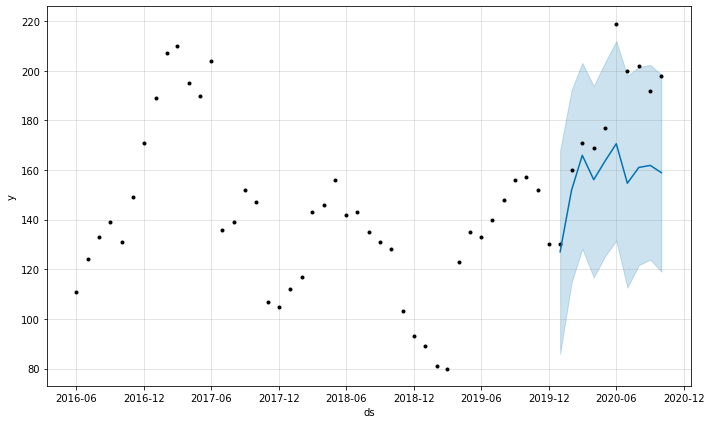

In [273]:
# plot forecast
model.plot(forecast)
pyplot.show()

In [274]:
from math import sqrt
from sklearn.metrics import mean_squared_error

rms = sqrt(mean_squared_error(df.y[:10], forecast.yhat_upper)) 
print(rms)

51.01412857677259


In [275]:
# calculate MAE between expected and predicted values for december
from sklearn.metrics import mean_absolute_error

y_true = df['y'][-10:].values
y_pred = forecast['yhat'].values
mae = mean_absolute_error(y_true, y_pred)
print('MAE: %.3f' % mae)

MAE: 24.637


In [276]:
df_val=pd.DataFrame({'Actual': df.y[:10], 'Predicted': forecast.yhat.astype(int)})
df_val

,Actual,Predicted
0,111,127
1,124,151
2,133,165
3,139,156
4,131,163
5,149,170
6,171,154
7,189,161
8,207,161
9,210,158


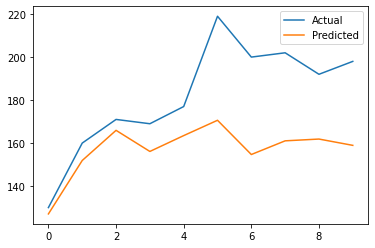

In [277]:
# plot expected vs actual
pyplot.plot(y_true, label='Actual')
pyplot.plot(y_pred, label='Predicted')
pyplot.legend()
pyplot.show()

Make an out of sample forecast

In [278]:
# define the period for which we want a prediction
future = list()
for i in range(1, 11):
	date = '1969-%02d' % i
	future.append([date])
future = pd.DataFrame(future)
future.columns = ['ds']
future['ds']= pd.to_datetime(future['ds'])

Manually evaluate model

In [279]:
# create test dataset, remove last 10 months
train = df.drop(df.index[-10:])
print(train)

           ds    y
0  2016-06-01  111
1  2016-07-01  124
2  2016-08-01  133
3  2016-09-01  139
4  2016-10-01  131
5  2016-11-01  149
6  2016-12-01  171
7  2017-01-01  189
8  2017-02-01  207
9  2017-03-01  210
10 2017-04-01  195
11 2017-05-01  190
12 2017-06-01  204
13 2017-07-01  136
14 2017-08-01  139
15 2017-09-01  152
16 2017-10-01  147
17 2017-11-01  107
18 2017-12-01  105
19 2018-01-01  112
20 2018-02-01  117
21 2018-03-01  143
22 2018-04-01  146
23 2018-05-01  156
24 2018-06-01  142
25 2018-07-01  143
26 2018-08-01  135
27 2018-09-01  131
28 2018-10-01  128
29 2018-11-01  103
30 2018-12-01   93
31 2019-01-01   89
32 2019-02-01   81
33 2019-03-01   80
34 2019-04-01  123
35 2019-05-01  135
36 2019-06-01  133
37 2019-07-01  140
38 2019-08-01  148
39 2019-09-01  156
40 2019-10-01  157
41 2019-11-01  152
42 2019-12-01  130
